# ***FACIAL EXPRESSION RECOGNITION***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import os.path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

from pathlib import Path
from pandas import read_csv
from sklearn import datasets
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn import metrics
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
DATADIR=r"/content/drive/MyDrive/Machine Learning 4th sem/train"
DATADIRtest=r"/content/drive/MyDrive/Machine Learning 4th sem/test"
Cate = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [4]:
label = []
flat_data = []

def create_training_data():
    i=1
    for category in Cate:
        class_num=Cate.index(category)
        path=os.path.join(DATADIR,category)
        for img in os.listdir(path):
            img_array=imread(os.path.join(path,img))
            img_resized=resize(img_array,(8,8,3))
            img_black = np.mean(img_resized,axis=2)
            flat_data.append(img_black.flatten())
            label.append(class_num)
            
create_training_data()

flat_data=np.array(flat_data)
label=np.array(label)

print(flat_data)
label=pd.DataFrame(label)

[[0.58235294 0.70294118 0.68431373 ... 0.47941176 0.28039216 0.20784314]
 [0.11372549 0.2127451  0.25686275 ... 0.38137255 0.24901961 0.14901961]
 [0.71470588 0.69607843 0.65980392 ... 0.38431373 0.20686275 0.03235294]
 ...
 [0.20980392 0.24901961 0.25784314 ... 0.48921569 0.60196078 0.46862745]
 [0.8872549  0.50882353 0.6372549  ... 0.58627451 0.53627451 0.47352941]
 [0.83921569 0.8372549  0.87254902 ... 0.59607843 0.68529412 0.90196078]]


In [5]:
flat_data = pd.DataFrame(flat_data)

flat_data.head(7)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.582353,0.702941,0.684314,0.604902,0.648039,0.583333,0.538235,0.587255,0.283333,0.378431,...,0.461765,0.273529,0.755882,0.868627,0.765686,0.508824,0.492157,0.479412,0.280392,0.207843
1,0.113725,0.212745,0.256863,0.555882,0.624510,0.538235,0.368627,0.229412,0.117647,0.223529,...,0.329412,0.215686,0.123529,0.200000,0.138235,0.370588,0.454902,0.381373,0.249020,0.149020
2,0.714706,0.696078,0.659804,0.645098,0.643137,0.614706,0.522549,0.443137,0.654902,0.588235,...,0.401961,0.254902,0.244118,0.399020,0.451961,0.454902,0.438235,0.384314,0.206863,0.032353
3,0.148039,0.336275,0.501961,0.585294,0.697059,0.694118,0.348039,0.563725,0.222549,0.495098,...,0.558824,0.121569,0.036275,0.057843,0.174510,0.364706,0.430392,0.456863,0.431373,0.117647
4,0.023529,0.031373,0.081373,0.135294,0.236275,0.360784,0.504902,0.173529,0.028431,0.097059,...,0.160784,0.350980,0.197059,0.176471,0.178431,0.193137,0.085294,0.022549,0.133333,0.371569
5,0.225490,0.188235,0.191176,0.270588,0.281373,0.259804,0.287255,0.345098,0.181373,0.186275,...,0.350980,0.228431,0.167647,0.224510,0.233333,0.319608,0.333333,0.274510,0.306863,0.221569
6,0.422549,0.428431,0.492157,0.518627,0.468627,0.411765,0.338235,0.231373,0.600000,0.549020,...,0.399020,0.396078,0.661765,0.668627,0.572549,0.254902,0.255882,0.197059,0.406863,0.386275


In [7]:
flat_data.shape



(28719, 65)

In [8]:
flat_data['label'] = label

X = flat_data.iloc[:,0:-1]
y = flat_data.iloc[:, 1]

In [9]:
classes=os.listdir(DATADIR)
print(classes)

['surprise', 'sad', 'happy', 'disgust', 'fear', 'angry', 'neutral']


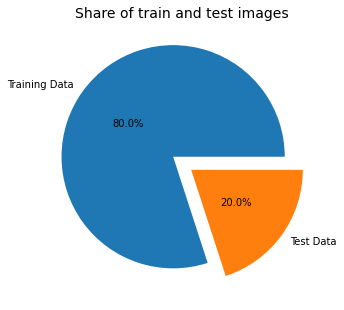

In [10]:
data_num=[0,0]
for cl in classes:
    data_num[0]+=len(os.listdir(os.path.join(DATADIR,cl)))
    data_num[1]+=len(os.listdir(os.path.join(DATADIRtest,cl)))


plt.figure(figsize=(5, 7))
plt.pie(x=np.array([x for x in data_num]), autopct="%.1f%%", explode=[0.1, 0.1], labels=["Training Data", "Test Data"], pctdistance=0.5)
plt.title("Share of train and test images", fontsize=14);    

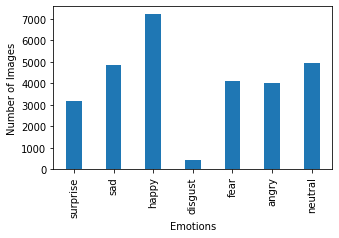

In [11]:
count={}
for x in classes:
    num=len(os.listdir(os.path.join(DATADIR,x)))
    count[x]=num


plt.figure(figsize=(5,3))
plt.bar(list(count.keys()), list(count.values()), width=0.4,align="center" )
plt.xticks(rotation=90)

plt.xlabel("Emotions")
plt.ylabel("Number of Images")
plt.show()

In [12]:
print(X)
print(y)

             0         1         2         3         4         5         6   \
0      0.582353  0.702941  0.684314  0.604902  0.648039  0.583333  0.538235   
1      0.113725  0.212745  0.256863  0.555882  0.624510  0.538235  0.368627   
2      0.714706  0.696078  0.659804  0.645098  0.643137  0.614706  0.522549   
3      0.148039  0.336275  0.501961  0.585294  0.697059  0.694118  0.348039   
4      0.023529  0.031373  0.081373  0.135294  0.236275  0.360784  0.504902   
...         ...       ...       ...       ...       ...       ...       ...   
28714  0.707843  0.556863  0.453922  0.393137  0.511765  0.602941  0.633333   
28715  0.807843  0.612745  0.727451  0.726471  0.615686  0.525490  0.667647   
28716  0.209804  0.249020  0.257843  0.233333  0.218627  0.221569  0.048039   
28717  0.887255  0.508824  0.637255  0.733333  0.672549  0.501961  0.363725   
28718  0.839216  0.837255  0.872549  0.862745  0.835294  0.798039  0.755882   

             7         8         9   ...        54 

In [341]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

In [342]:
truth =      ['happy','neutral','sad','angry','fear','disgust','fear','angry','angry','disgust','fear','happy','neutral','sad','surprise','happy','neutral','fear','surprise']
prediction = ['angry','disgust','fear','happy','sad','neutral','sad','surprise','angry','disgust','fear','happy','neutral','sad','angry','happy','surprise','sad','surprise']

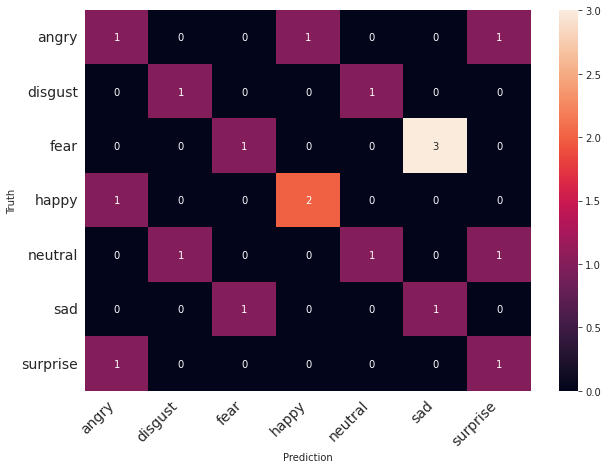

In [343]:
cm = confusion_matrix(truth,prediction)
print_confusion_matrix(cm,['angry','disgust','fear','happy','neutral','sad','surprise'])

In [344]:
print(classification_report(truth, prediction))

              precision    recall  f1-score   support

       angry       0.33      0.33      0.33         3
     disgust       0.50      0.50      0.50         2
        fear       0.50      0.25      0.33         4
       happy       0.67      0.67      0.67         3
     neutral       0.50      0.33      0.40         3
         sad       0.25      0.50      0.33         2
    surprise       0.33      0.50      0.40         2

    accuracy                           0.42        19
   macro avg       0.44      0.44      0.42        19
weighted avg       0.46      0.42      0.42        19



# **LINEAR** **REGRESSION**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [34]:
flat_data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,0.582353,0.702941,0.684314,0.604902,0.648039,0.583333,0.538235,0.587255,0.283333,0.378431,...,0.273529,0.755882,0.868627,0.765686,0.508824,0.492157,0.479412,0.280392,0.207843,0


In [35]:
flat_data.shape

(28719, 65)

In [36]:
X = flat_data.iloc[:,0:-1]
y = flat_data.iloc[:, 1]

In [39]:
print(x)
print(y)

neutral
0        0.702941
1        0.212745
2        0.696078
3        0.336275
4        0.031373
           ...   
28714    0.556863
28715    0.612745
28716    0.249020
28717    0.508824
28718    0.837255
Name: 1, Length: 28719, dtype: float64


In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,label,test_size=0.25,random_state=45)

In [41]:
print(x_train)
print(y_train)

             0         1         2         3         4         5         6   \
27365  0.412745  0.599020  0.796078  0.860784  0.811765  0.643137  0.350000   
12951  0.586275  0.598039  0.584314  0.685294  0.801961  0.935294  0.901961   
2804   0.599020  0.760784  0.811765  0.745098  0.554902  0.454902  0.427451   
9998   0.407843  0.500980  0.581373  0.665686  0.706863  0.656863  0.664706   
14314  0.207843  0.188235  0.193137  0.187255  0.165686  0.136275  0.117647   
...         ...       ...       ...       ...       ...       ...       ...   
12895  0.109804  0.161765  0.107843  0.166667  0.399020  0.747059  0.672549   
28192  0.669608  0.646078  0.589216  0.565686  0.672549  0.767647  0.811765   
6012   0.090196  0.164706  0.597059  0.757843  0.700000  0.777451  0.555882   
6558   0.824510  0.485294  0.673529  0.795098  0.748039  0.634314  0.534314   
23499  0.325490  0.447059  0.574510  0.690196  0.716667  0.544118  0.443137   

             7         8         9   ...        54 

In [42]:
print(x_test)
print(y_test)

             0         1         2         3         4         5         6   \
26793  0.252941  0.209804  0.388235  0.498039  0.478431  0.382353  0.277451   
14923  0.232353  0.505882  0.769608  0.839216  0.872549  0.851961  0.709804   
21083  0.724510  0.841176  0.908824  0.898039  0.867647  0.810784  0.693137   
26762  0.476471  0.356863  0.537255  0.787255  0.812745  0.686275  0.612745   
8694   0.200000  0.498039  0.740196  0.792157  0.739216  0.623529  0.366667   
...         ...       ...       ...       ...       ...       ...       ...   
3504   0.843137  0.519608  0.378431  0.357843  0.502941  0.785294  0.528431   
10261  0.436275  0.443137  0.532353  0.498039  0.554902  0.683333  0.751961   
8942   0.771569  0.217647  0.502941  0.690196  0.727451  0.672549  0.335294   
26834  0.224510  0.556863  0.700000  0.750980  0.699020  0.590196  0.749020   
25093  0.308824  0.298039  0.242157  0.222549  0.201961  0.196078  0.241176   

             7         8         9   ...        54 

In [43]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [44]:
y_pred=model.predict(x_test)
y_pred

array([[3.80305581],
       [2.84222863],
       [3.3724817 ],
       ...,
       [3.52738368],
       [3.50837572],
       [3.41692416]])

In [45]:
x_pred = model.predict(x_train)
x_pred

array([[3.4459254 ],
       [3.07117933],
       [3.28213365],
       ...,
       [3.45841398],
       [4.15706802],
       [3.44182905]])

In [46]:
y_test[:6]

,0
26793,6
14923,3
21083,5
26762,6
8694,3
12912,3


In [47]:
model.predict(x_test[:5])

array([[3.80305581],
       [2.84222863],
       [3.3724817 ],
       [3.85857243],
       [2.61863919]])

In [48]:
model.score(x_test,y_test)

0.05019689137485128

Text(0, 0.5, 'Emotions')

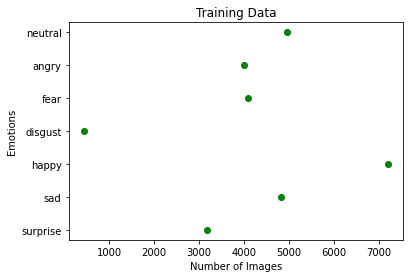

In [139]:
plt.scatter(count.values(),classes,color='green')

plt.title('Training Data')
plt.xlabel('Number of Images')
plt.ylabel('Emotions')

In [ ]:
plt.scatter(x_train,y_train,color='green')
plt.plot(x_train,x_pred, color='red')
plt.title('Salary vs Experience (Training Dataset)')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

#visualizing the Test set results  
plt.scatter(x_test, y_test, color="blue")   
plt.plot(x_train, x_pred, color="red")    
plt.title("Salary vs Experience (Test Dataset)")  
plt.xlabel("Years of Experience")  
plt.ylabel("Salary(In Rupees)") 

# **LOGISTIC** **REGRESSION**

In [66]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression

In [67]:
flat_data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,0.582353,0.702941,0.684314,0.604902,0.648039,0.583333,0.538235,0.587255,0.283333,0.378431,...,0.273529,0.755882,0.868627,0.765686,0.508824,0.492157,0.479412,0.280392,0.207843,0
1,0.113725,0.212745,0.256863,0.555882,0.624510,0.538235,0.368627,0.229412,0.117647,0.223529,...,0.215686,0.123529,0.200000,0.138235,0.370588,0.454902,0.381373,0.249020,0.149020,0
2,0.714706,0.696078,0.659804,0.645098,0.643137,0.614706,0.522549,0.443137,0.654902,0.588235,...,0.254902,0.244118,0.399020,0.451961,0.454902,0.438235,0.384314,0.206863,0.032353,0
3,0.148039,0.336275,0.501961,0.585294,0.697059,0.694118,0.348039,0.563725,0.222549,0.495098,...,0.121569,0.036275,0.057843,0.174510,0.364706,0.430392,0.456863,0.431373,0.117647,0
4,0.023529,0.031373,0.081373,0.135294,0.236275,0.360784,0.504902,0.173529,0.028431,0.097059,...,0.350980,0.197059,0.176471,0.178431,0.193137,0.085294,0.022549,0.133333,0.371569,0


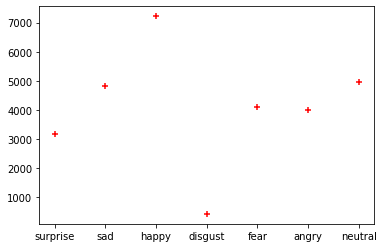

In [91]:
plt.scatter(count.keys(),count.values(), marker = '+', color = 'red')

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,label,test_size=0.25)

In [100]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [111]:
lorg=LogisticRegression(random_state=0)
lorg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [112]:
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [113]:
x_test
y_test

,0
12089,3
10217,3
9147,3
639,0
16213,4
...,...
10114,3
21428,5
24961,5
11870,3


In [114]:
y_pred = classifier.predict(x_test)

In [115]:
y_pred=lorg.predict(x_test)
print(y_pred)

[3 3 3 ... 5 3 3]


In [116]:
model.predict(x_test)

array([3, 3, 3, ..., 5, 3, 3])

In [117]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[  77,    0,   55,  412,  178,  209,   62],
       [   4,    0,   11,   45,   18,   16,   12],
       [  41,    0,  107,  356,  175,  168,  136],
       [  39,    0,   51, 1293,  147,  193,   64],
       [  47,    0,   64,  505,  385,  204,   83],
       [  45,    0,   66,  469,  229,  342,   65],
       [  19,    0,   73,  204,  108,   58,  345]])

In [118]:
model = LogisticRegression()

In [120]:
accuracy_score(y_test, y_pred)

0.35501392757660166

# **SUPPORT VECTOR REGRESSION**

In [122]:
import pandas as pd
from sklearn.svm import SVC
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, accuracy_score

In [123]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [126]:
flat_data0=flat_data[flat_data.label ==0]
flat_data1=flat_data[flat_data.label ==1]
flat_data2=flat_data[flat_data.label ==2]

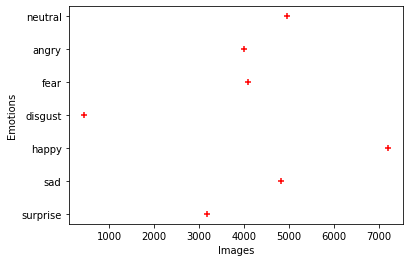

In [154]:
plt.ylabel('Emotions')
plt.xlabel('Images')
plt.scatter(count.values(),count.keys(),marker='+',color= 'red')


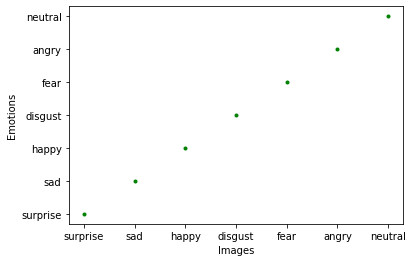

In [155]:
plt.ylabel('Emotions')
plt.xlabel('Images')
plt.scatter(classes,classes,marker='.',color= 'green')

In [170]:
y_pred = classifier.predict(x_test)

In [171]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  77    0   55  412  178  209   62]
 [   4    0   11   45   18   16   12]
 [  41    0  107  356  175  168  136]
 [  39    0   51 1293  147  193   64]
 [  47    0   64  505  385  204   83]
 [  45    0   66  469  229  342   65]
 [  19    0   73  204  108   58  345]]


In [172]:
accuracy_score(y_test, y_pred)

0.35501392757660166

# **Naive Bayes Classifier** 

In [173]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

In [241]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [242]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,label, test_size = 0.20)


In [243]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()

In [244]:
x_train.shape

(22975, 64)

In [245]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [246]:
y_pred = classifier.predict(x_test)

In [247]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 31   0  33 145  36 267 265]
 [  4   0   2  15   2  18  34]
 [ 25   3  51 131  48 200 369]
 [ 46   0  40 340  87 393 534]
 [ 21   0  26 205 110 335 294]
 [ 45   3  46 138  62 389 272]
 [ 17   2  29  96  34  82 419]]


In [248]:
accuracy_score(y_test, y_pred)

0.23328690807799443

In [249]:
model.score(x_test,y_test)

0.2512186629526462

# **DECISION TREE CLASSIFICATION**


In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [251]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [252]:
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [253]:
flat_data.shape


(28719, 67)

In [266]:
flat_data.columns

Index([        0,         1,         2,         3,         4,         5,
               6,         7,         8,         9,        10,        11,
              12,        13,        14,        15,        16,        17,
              18,        19,        20,        21,        22,        23,
              24,        25,        26,        27,        28,        29,
              30,        31,        32,        33,        34,        35,
              36,        37,        38,        39,        40,        41,
              42,        43,        44,        45,        46,        47,
              48,        49,        50,        51,        52,        53,
              54,        55,        56,        57,        58,        59,
              60,        61,        62,        63,   'label', 'DATADIR',
         'happy'],
      dtype='object')

In [267]:
flat_data.isnull().sum()

0          0
1          0
2          0
3          0
4          0
          ..
62         0
63         0
label      0
DATADIR    0
happy      0
Length: 67, dtype: int64

In [268]:
sns.set_style("darkgrid")

In [276]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(DATADIR, test_size = 0.2)

In [287]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
predictions = dtree.predict(x_test)

In [288]:
X = DATADIR
Y = DATADIRtest

In [289]:
dtree1 = DecisionTreeClassifier()
dtree1.fit(x_train, y_train)
print("Decision Tree Classifier is created")

Decision Tree Classifier is created


In [290]:
classifier_dt= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier_dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [291]:
y_pred_dt= classifier.predict(x_test)
y_pred_dt

array([0, 2, 4, ..., 0, 0, 5])

In [292]:
cm= confusion_matrix(y_test, y_pred_dt) 
print(cm)

[[208  16  99 153 110 129  62]
 [  8  23   5  12   6  15   6]
 [103   6 241 148 125 140  64]
 [182  19 159 566 215 200  99]
 [120  11 139 202 283 165  71]
 [148  19 125 164 176 251  72]
 [ 71   4  69  88  82  73 292]]


In [293]:
print("The accuracy of Decision Tree is:", metrics.accuracy_score(predictions, y_test))

The accuracy of Decision Tree is: 0.32137883008356544


# **RANDOM FOREST CLASSIFIER**

In [295]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [296]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [297]:
y_pred = classifier.predict(x_test)

In [298]:
clf=RandomForestClassifier(n_estimators=100)


clf.fit(x_train, y_train)

y_pred=clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [299]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 176    0   59  287   99  124   32]
 [   6   31    3   14   10    9    2]
 [  52    0  247  245  126  102   55]
 [  60    0   39 1088  114  105   34]
 [  37    0   56  344  381  141   32]
 [  90    0   79  287  166  304   29]
 [  19    0   46  123   56   45  390]]


In [300]:
print("accuracy:",metrics.accuracy_score(y_test, y_pred))

accuracy: 0.4556058495821727


# **LASSO AND RIDGE REGRESSION**


In [335]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

In [321]:
model = LinearRegression()

In [322]:
model.fit(x_train,y_train)

LinearRegression()

In [323]:
model.score(x_test,y_test)

0.03476006388993691

In [324]:
model.score(x_train, y_train)

0.048945258582593465

In [325]:
lasso_model = Lasso()

In [326]:
lasso_model.fit(x_train, y_train)

Lasso()

In [327]:
model_lasso = Lasso(alpha=0)
model_lasso.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.535e+04, tolerance: 7.434e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, po

Lasso(alpha=0)

In [328]:
model_r = Ridge(alpha = 0.5, normalize = False, tol = 0.01, \
              solver ='auto', random_state = 42)
model_r.fit(x_train, y_train)
  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


Ridge(alpha=0.5, normalize=False, random_state=42, tol=0.01)

In [329]:
pred_lasso= model_lasso.predict(x_test)
print(np.sqrt(mean_squared_error(pred_lasso, y_test)))

1.7669604398758973


In [330]:
y_pred_r = model_r.predict(x_test)

In [331]:
r2_score(y_test,y_pred_r)

0.034823377532608224

In [334]:
ridge_model = Ridge()

In [336]:
ridge_model.fit(x_train,y_train)

Ridge()

In [337]:
ridge_model.score(x_test, y_test)

0.034879800855174725

In [338]:
ridge_model.score(x_train,y_train)

0.048934200784315984

In [339]:
accuracy_score(y_test, y_pred)

0.4556058495821727